In [1]:
from financeiro import FinancialData
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from algo_trade import long_short_invest
import warnings
warnings.filterwarnings('ignore')

## Funções

In [2]:
def plot_long_short(df, short, long):
    posi = [(0,0), (0,1), (0,2), (1, 0), (1, 1)]
    fig, axs = plt.subplots(2, 3, figsize=(40, 30))
    plt.style.use('seaborn-whitegrid')                               
    for each, pos in zip(df.columns, posi):                                           
        ativo = each                                             
        axs[pos[0], pos[1]].plot(short.index, short[ativo],                      
        color='green', label='Short')                             
        axs[pos[0], pos[1]].plot(long.index, long[ativo],                        
        color='b', label='Long')                                  
        axs[pos[0], pos[1]].set_title("Médias {}".format(each))                                
        axs[pos[0], pos[1]].legend(loc='upper left', fontsize=20)                           

In [3]:
def plot_buy_sell_long_short(df, short, long, long_short_diff):
    posi = [(0,0), (0,1), (0,2), (1, 0), (1, 1)]
    fig, axs = plt.subplots(2, 3, figsize=(40, 30))
    plt.style.use('seaborn-whitegrid')                                 
    for each, pos in zip(df.columns, posi):                                           
        ativo = each                                                       
        axs[pos[0], pos[1]].plot(short[ativo], label='Short')                         
        axs[pos[0], pos[1]].plot(long[ativo], label='Long')                           
        axs[pos[0], pos[1]].set_ylabel("Preço [R$]", fontsize=25)                              
        axs[pos[0], pos[1]].set_xlabel("Data", fontsize=25)                                    
        axs[pos[0], pos[1]].set_title("Médias {}".format(each), fontsize=25)
        filter_buy = long_short_diff[long_short_diff[ativo] == "buy"].index
        axs[pos[0], pos[1]].plot(short[ativo][short[ativo].index.isin(filter_buy)].index,
                 short[ativo][short[ativo].index.isin(filter_buy)],     
        '^', markersize=10, color='m', label='Buy')
        filter_sell = long_short_diff[long_short_diff[ativo] == "sell"].index
        axs[pos[0], pos[1]].plot(short[ativo][short[ativo].index.isin(filter_sell)].index,                    
                 short[ativo][short[ativo].index.isin(filter_sell)],    
        'v', markersize=10, color='k', label='Sell')               
        axs[pos[0], pos[1]].legend(loc='upper left', fontsize=25)                          

## Extraindo dado

In [4]:
ativos = ["IRBR3.SA", "AAPL34.SA", "CSNA3.SA", "CESP6.SA", "TEND3.SA"]

In [5]:
fi = FinancialData()

In [6]:
# date_train = ("2017-11-03", "2019-11-03")
# date_test = ("2019-11-03", "2020-11-03")
# train = fi.extract_data_from_actives(ativos, date_train, "yahoo")
# test = fi.extract_data_from_actives(ativos, date_test, "yahoo")

In [7]:
# train.to_csv("train.csv")
# test.to_csv("test.csv")

In [8]:
train = pd.read_csv("train.csv", index_col=["Date"])
test = pd.read_csv("test.csv", index_col=["Date"])

In [9]:
train.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
Date,,,,,
2017-11-03,10.332370,12.292687,6.622097,11.140564,8.196823
2017-11-06,10.492818,12.351051,6.970628,11.328478,7.918885
2017-11-07,10.495966,12.405088,6.671887,11.006340,7.848224
2017-11-08,10.675483,12.431026,6.862750,11.409012,7.914174
2017-11-09,10.637805,12.465922,6.514218,11.051082,7.867068


In [10]:
test.head()

,IRBR3.SA,AAPL34.SA,CSNA3.SA,CESP6.SA,TEND3.SA
Date,,,,,
2019-11-04,36.788086,25.170553,12.074782,27.723089,25.334667
2019-11-05,36.845207,25.067837,12.284345,27.797264,25.207506
2019-11-06,36.188278,25.427347,12.274364,27.852898,25.315102
2019-11-07,34.607838,26.251709,12.573739,27.389301,25.217289
2019-11-08,33.417744,26.952513,12.274364,27.630369,24.962963


## Verificando qualidade do dado

<AxesSubplot:ylabel='Date'>

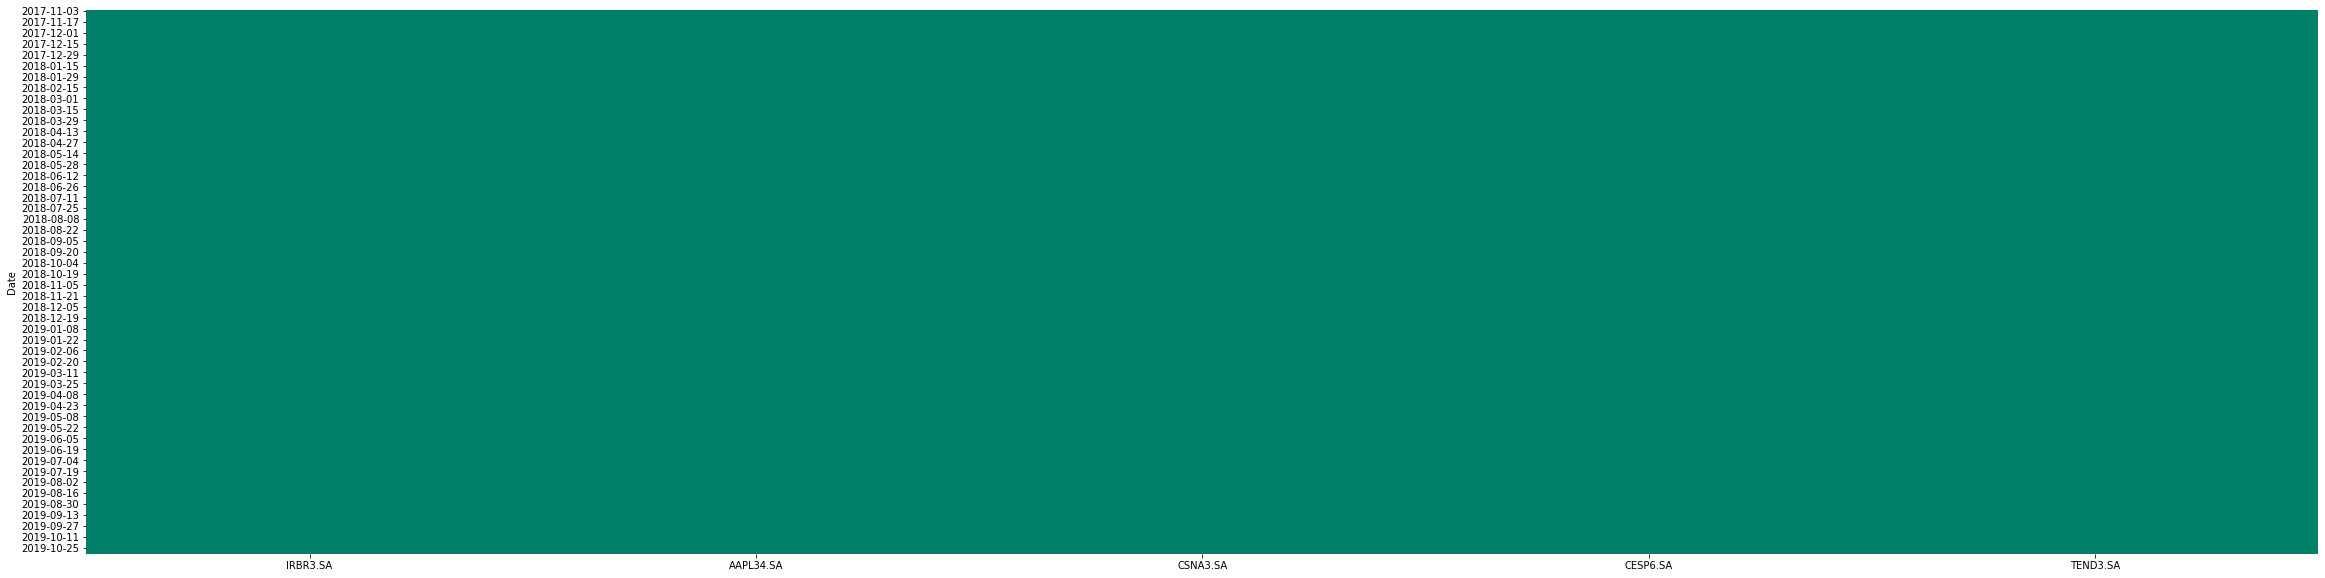

In [11]:
fi.plot_data_segmentation(train)

<AxesSubplot:ylabel='Date'>

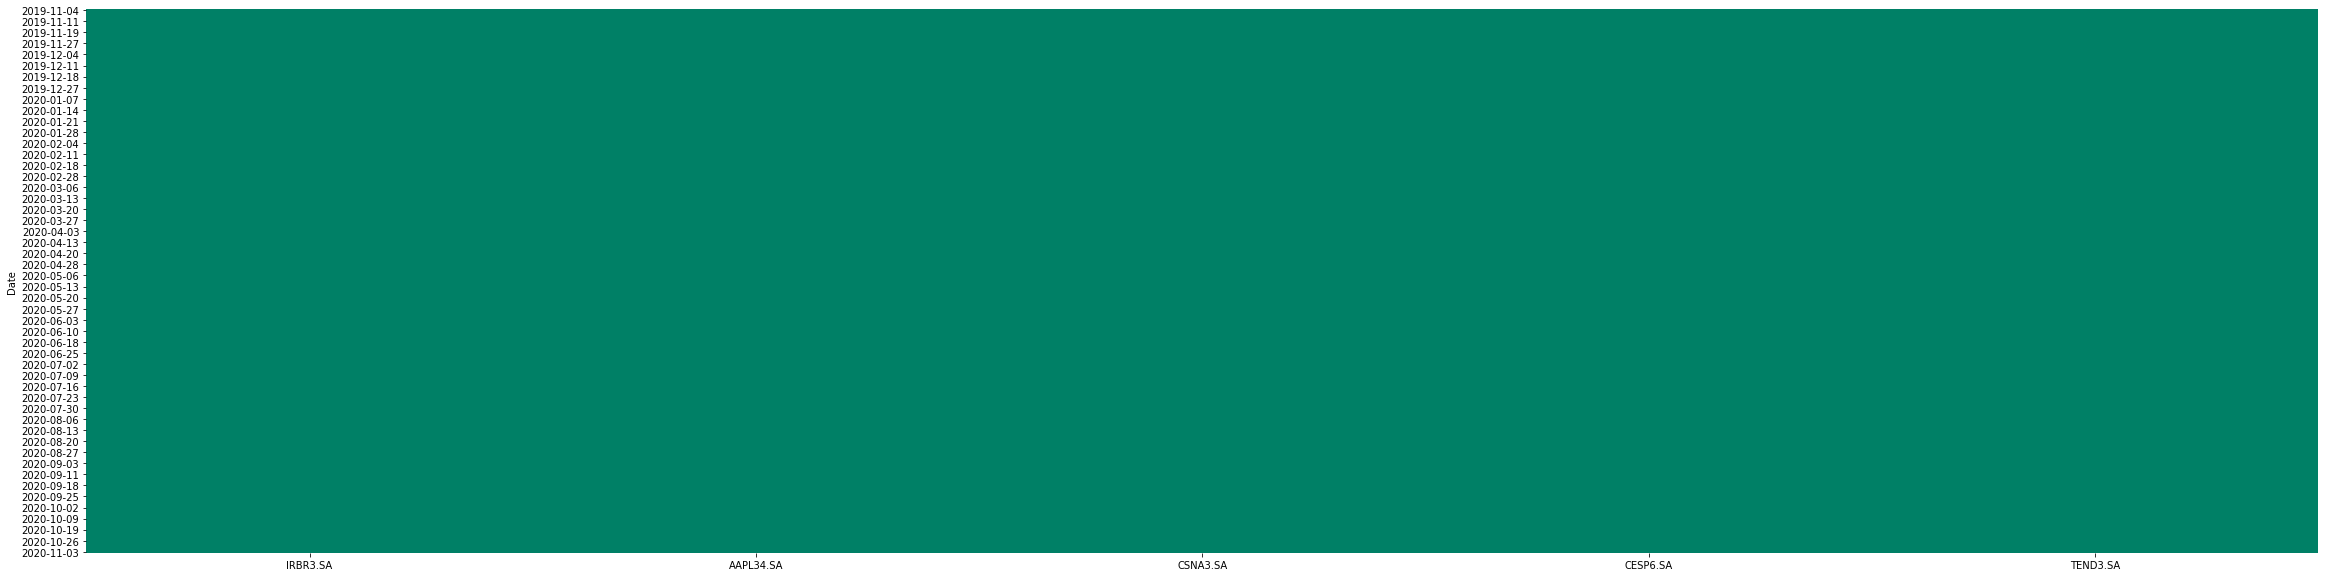

In [12]:
fi.plot_data_segmentation(test)

## Processando dados

In [13]:
train = train.dropna()
test = test.dropna()

## Média móvel curta e longa

In [14]:
window_s = 3
window_l = 6
capital = 100000

## Train

In [15]:
short, long, long_short, long_short_diff, _ = long_short_invest(train, 3, 6, capital)

IRBR3.SA: 1407.8
AAPL34.SA: 4144.1
CSNA3.SA: -581.24
CESP6.SA: 5260.28
TEND3.SA: 1083.82
Total de lucro da carteira: 11314.75


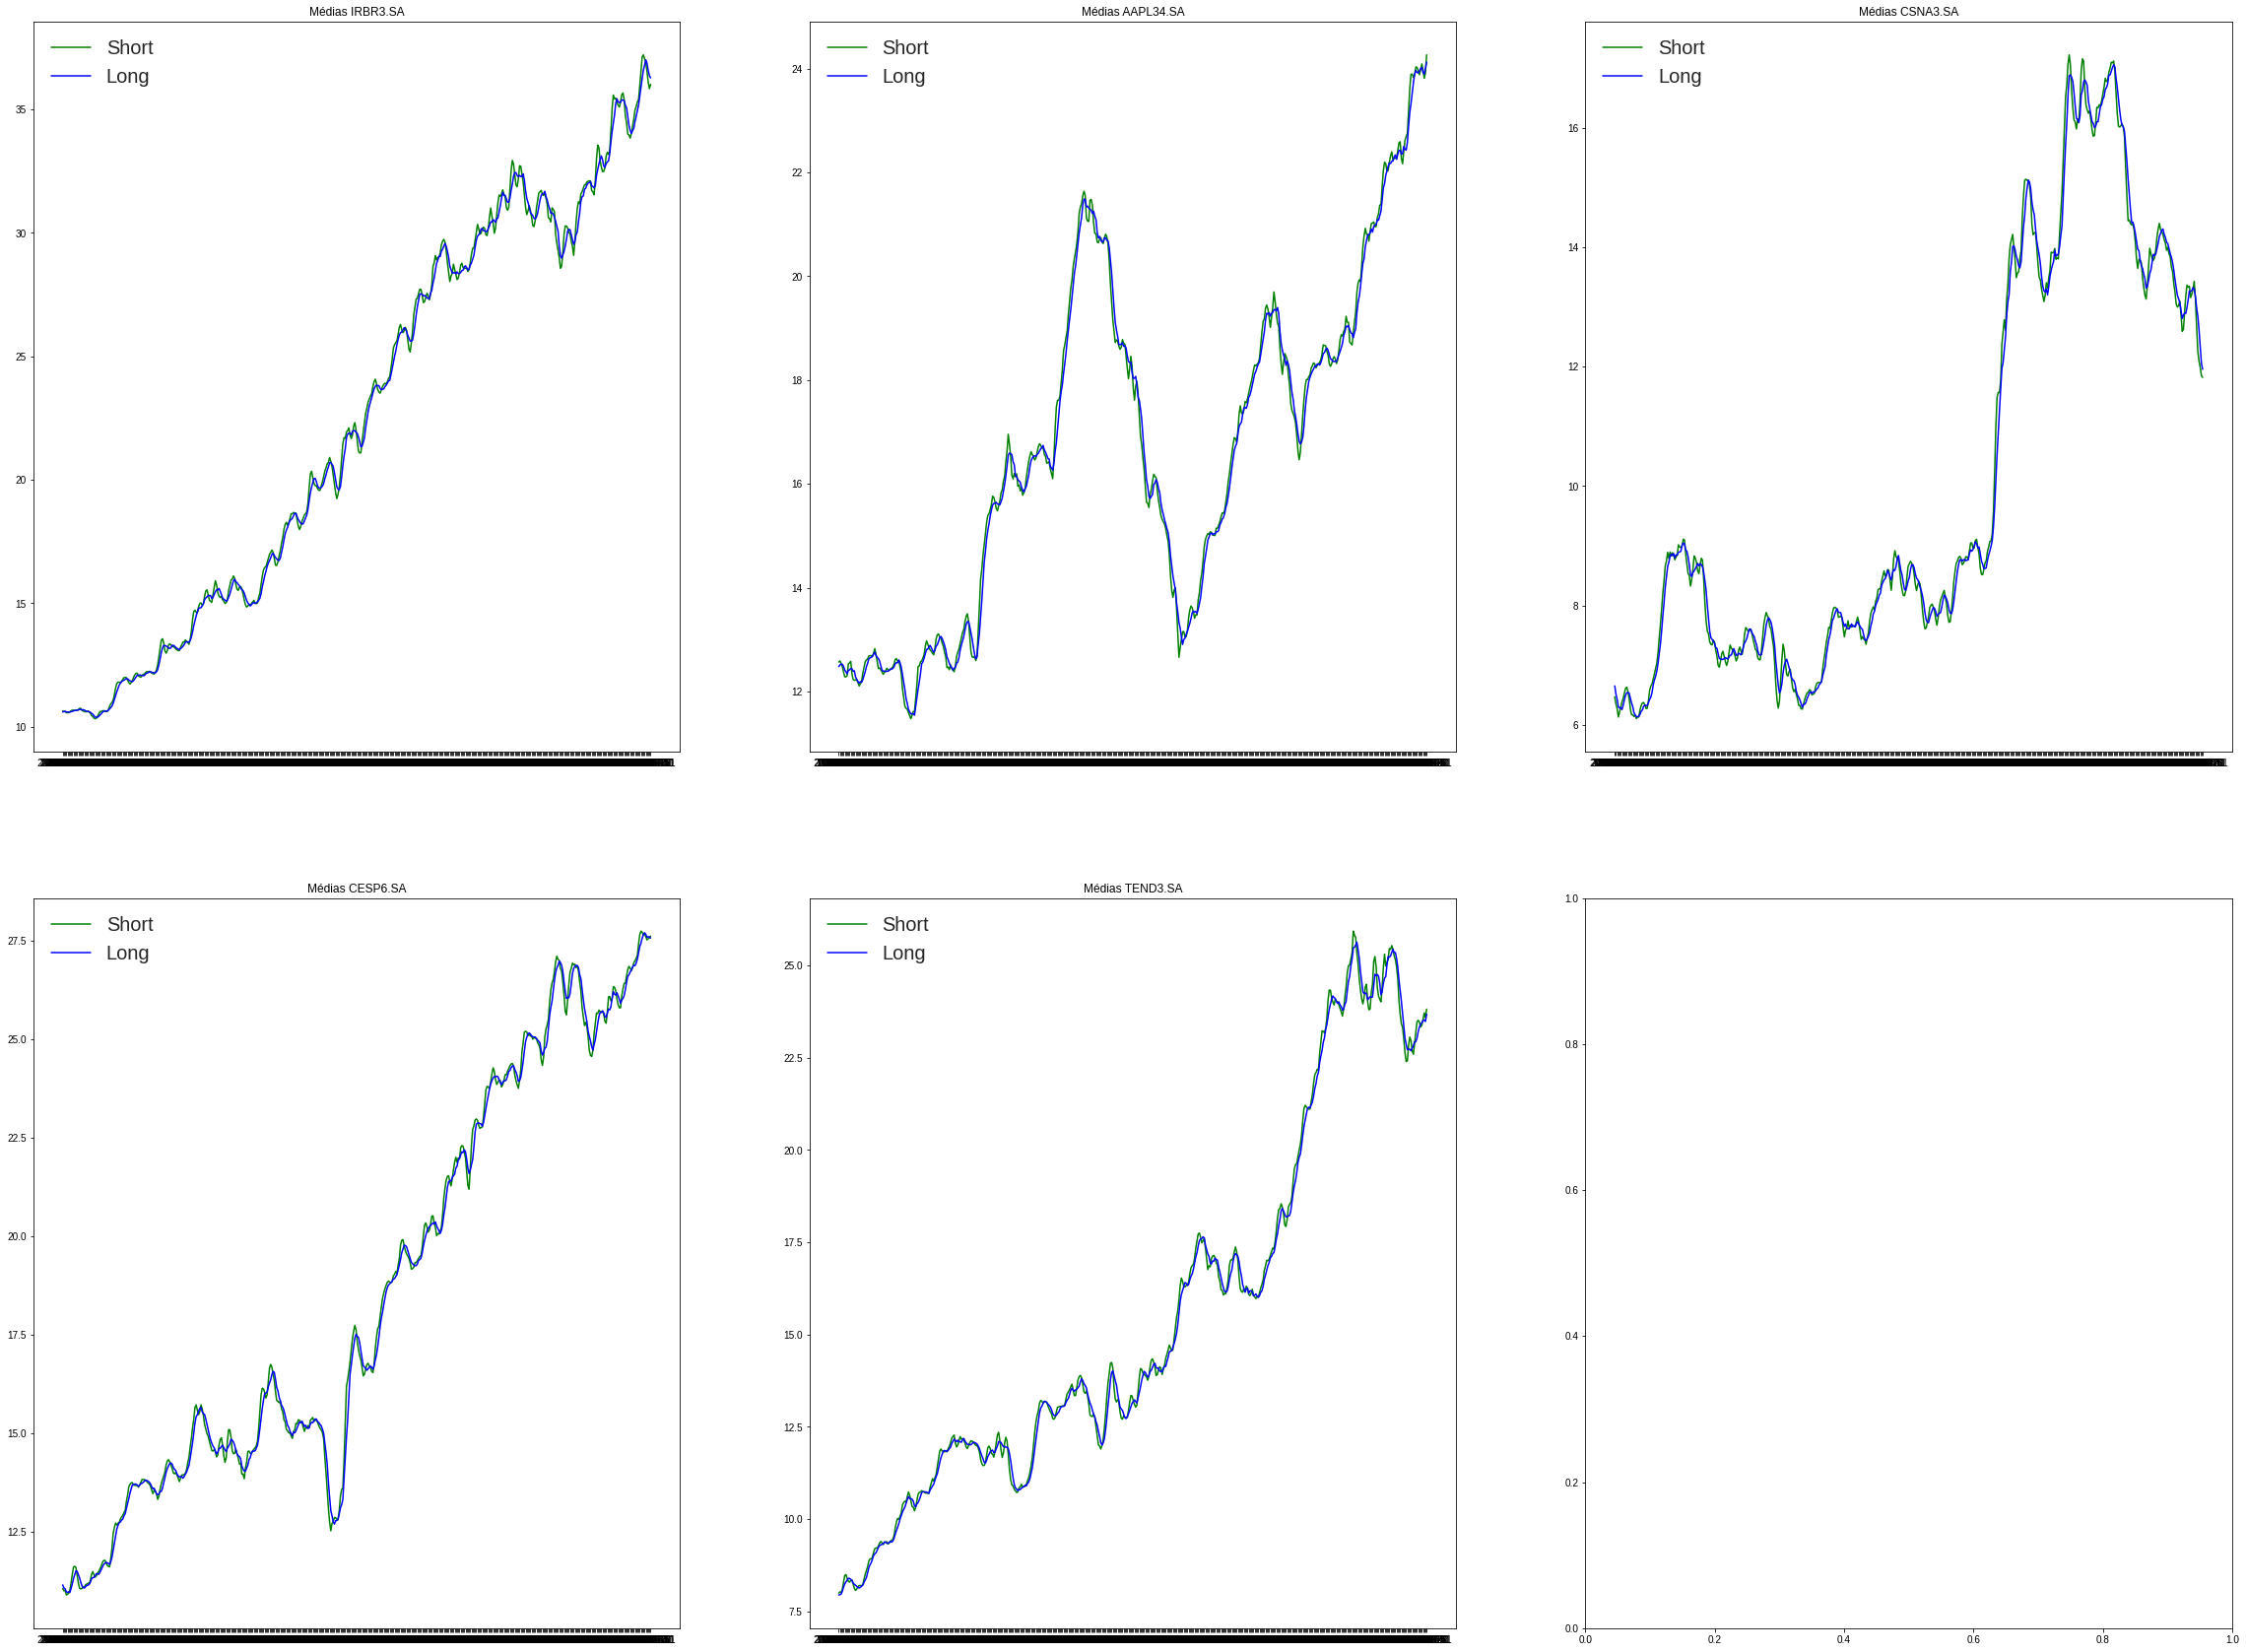

In [16]:
plot_long_short(train, short, long)

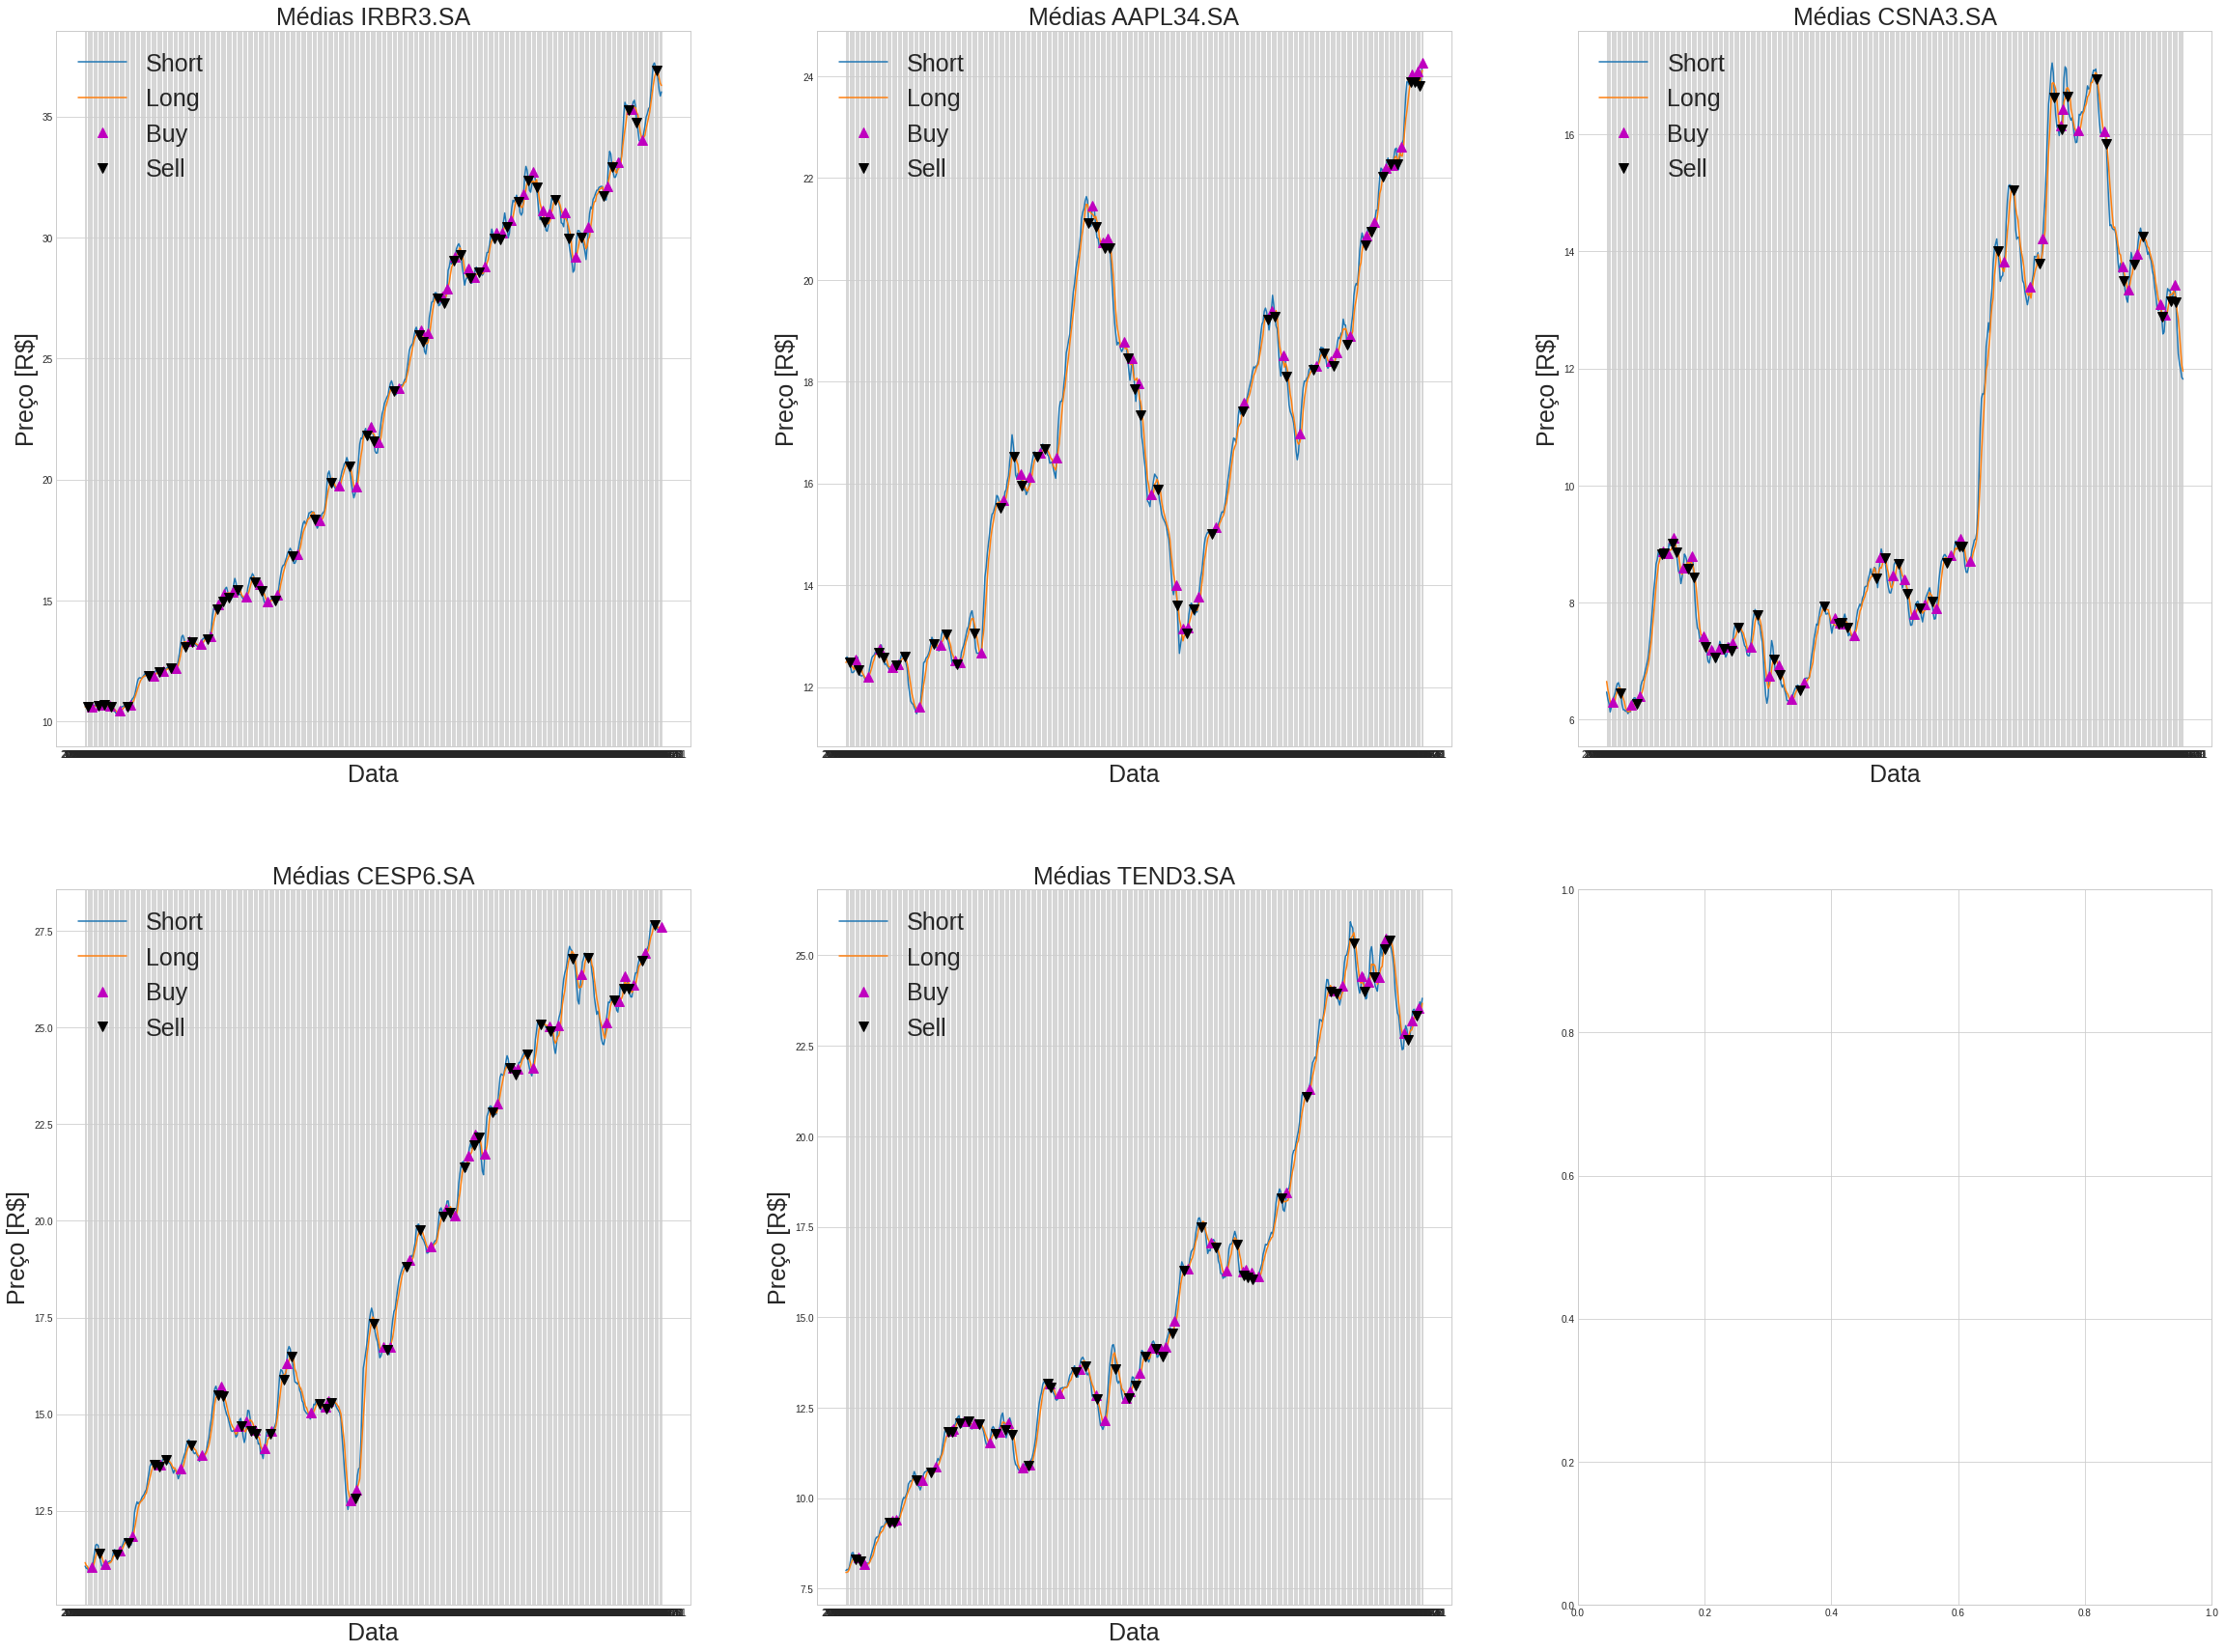

In [17]:
plot_buy_sell_long_short(train, short, long, long_short_diff)

## Test

In [18]:
short_t, long_t, long_short_t, long_short_diff_t, _ = long_short_invest(test, 3, 6, capital)

IRBR3.SA: -2546.39
AAPL34.SA: 14381.54
CSNA3.SA: 99.49
CESP6.SA: -600.53
TEND3.SA: -137.8
Total de lucro da carteira: 11196.3


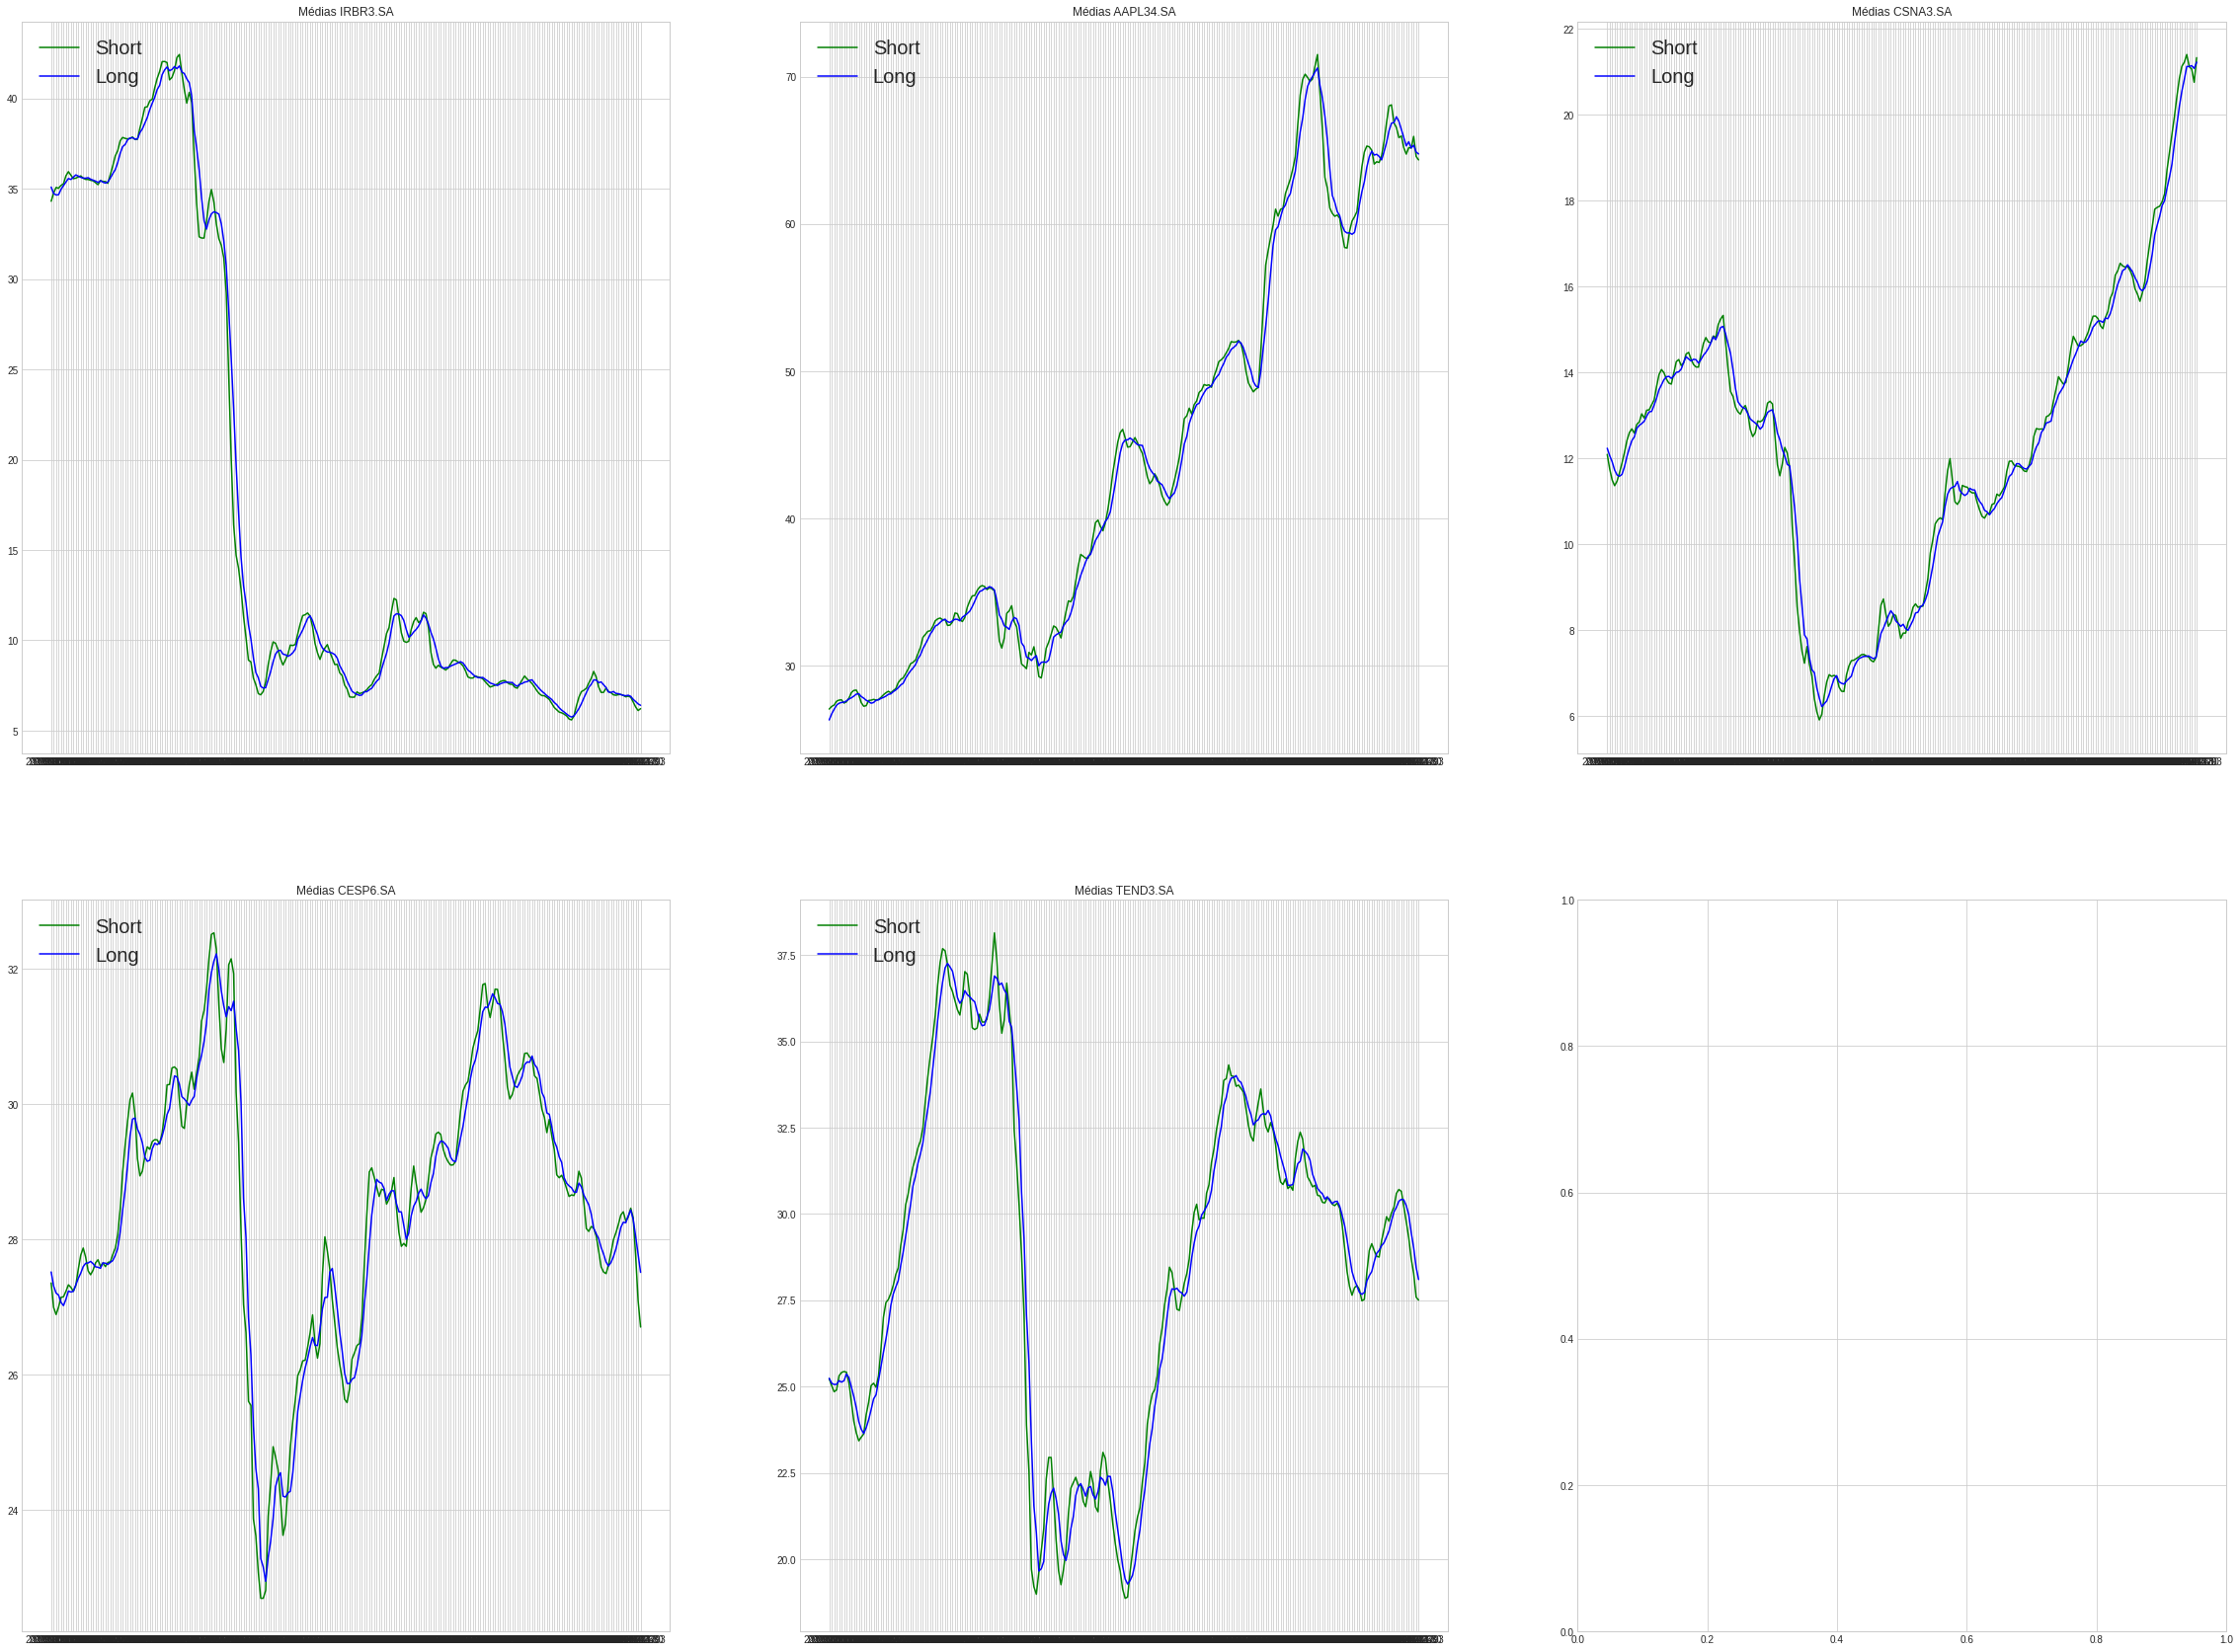

In [19]:
plot_long_short(test, short_t, long_t)

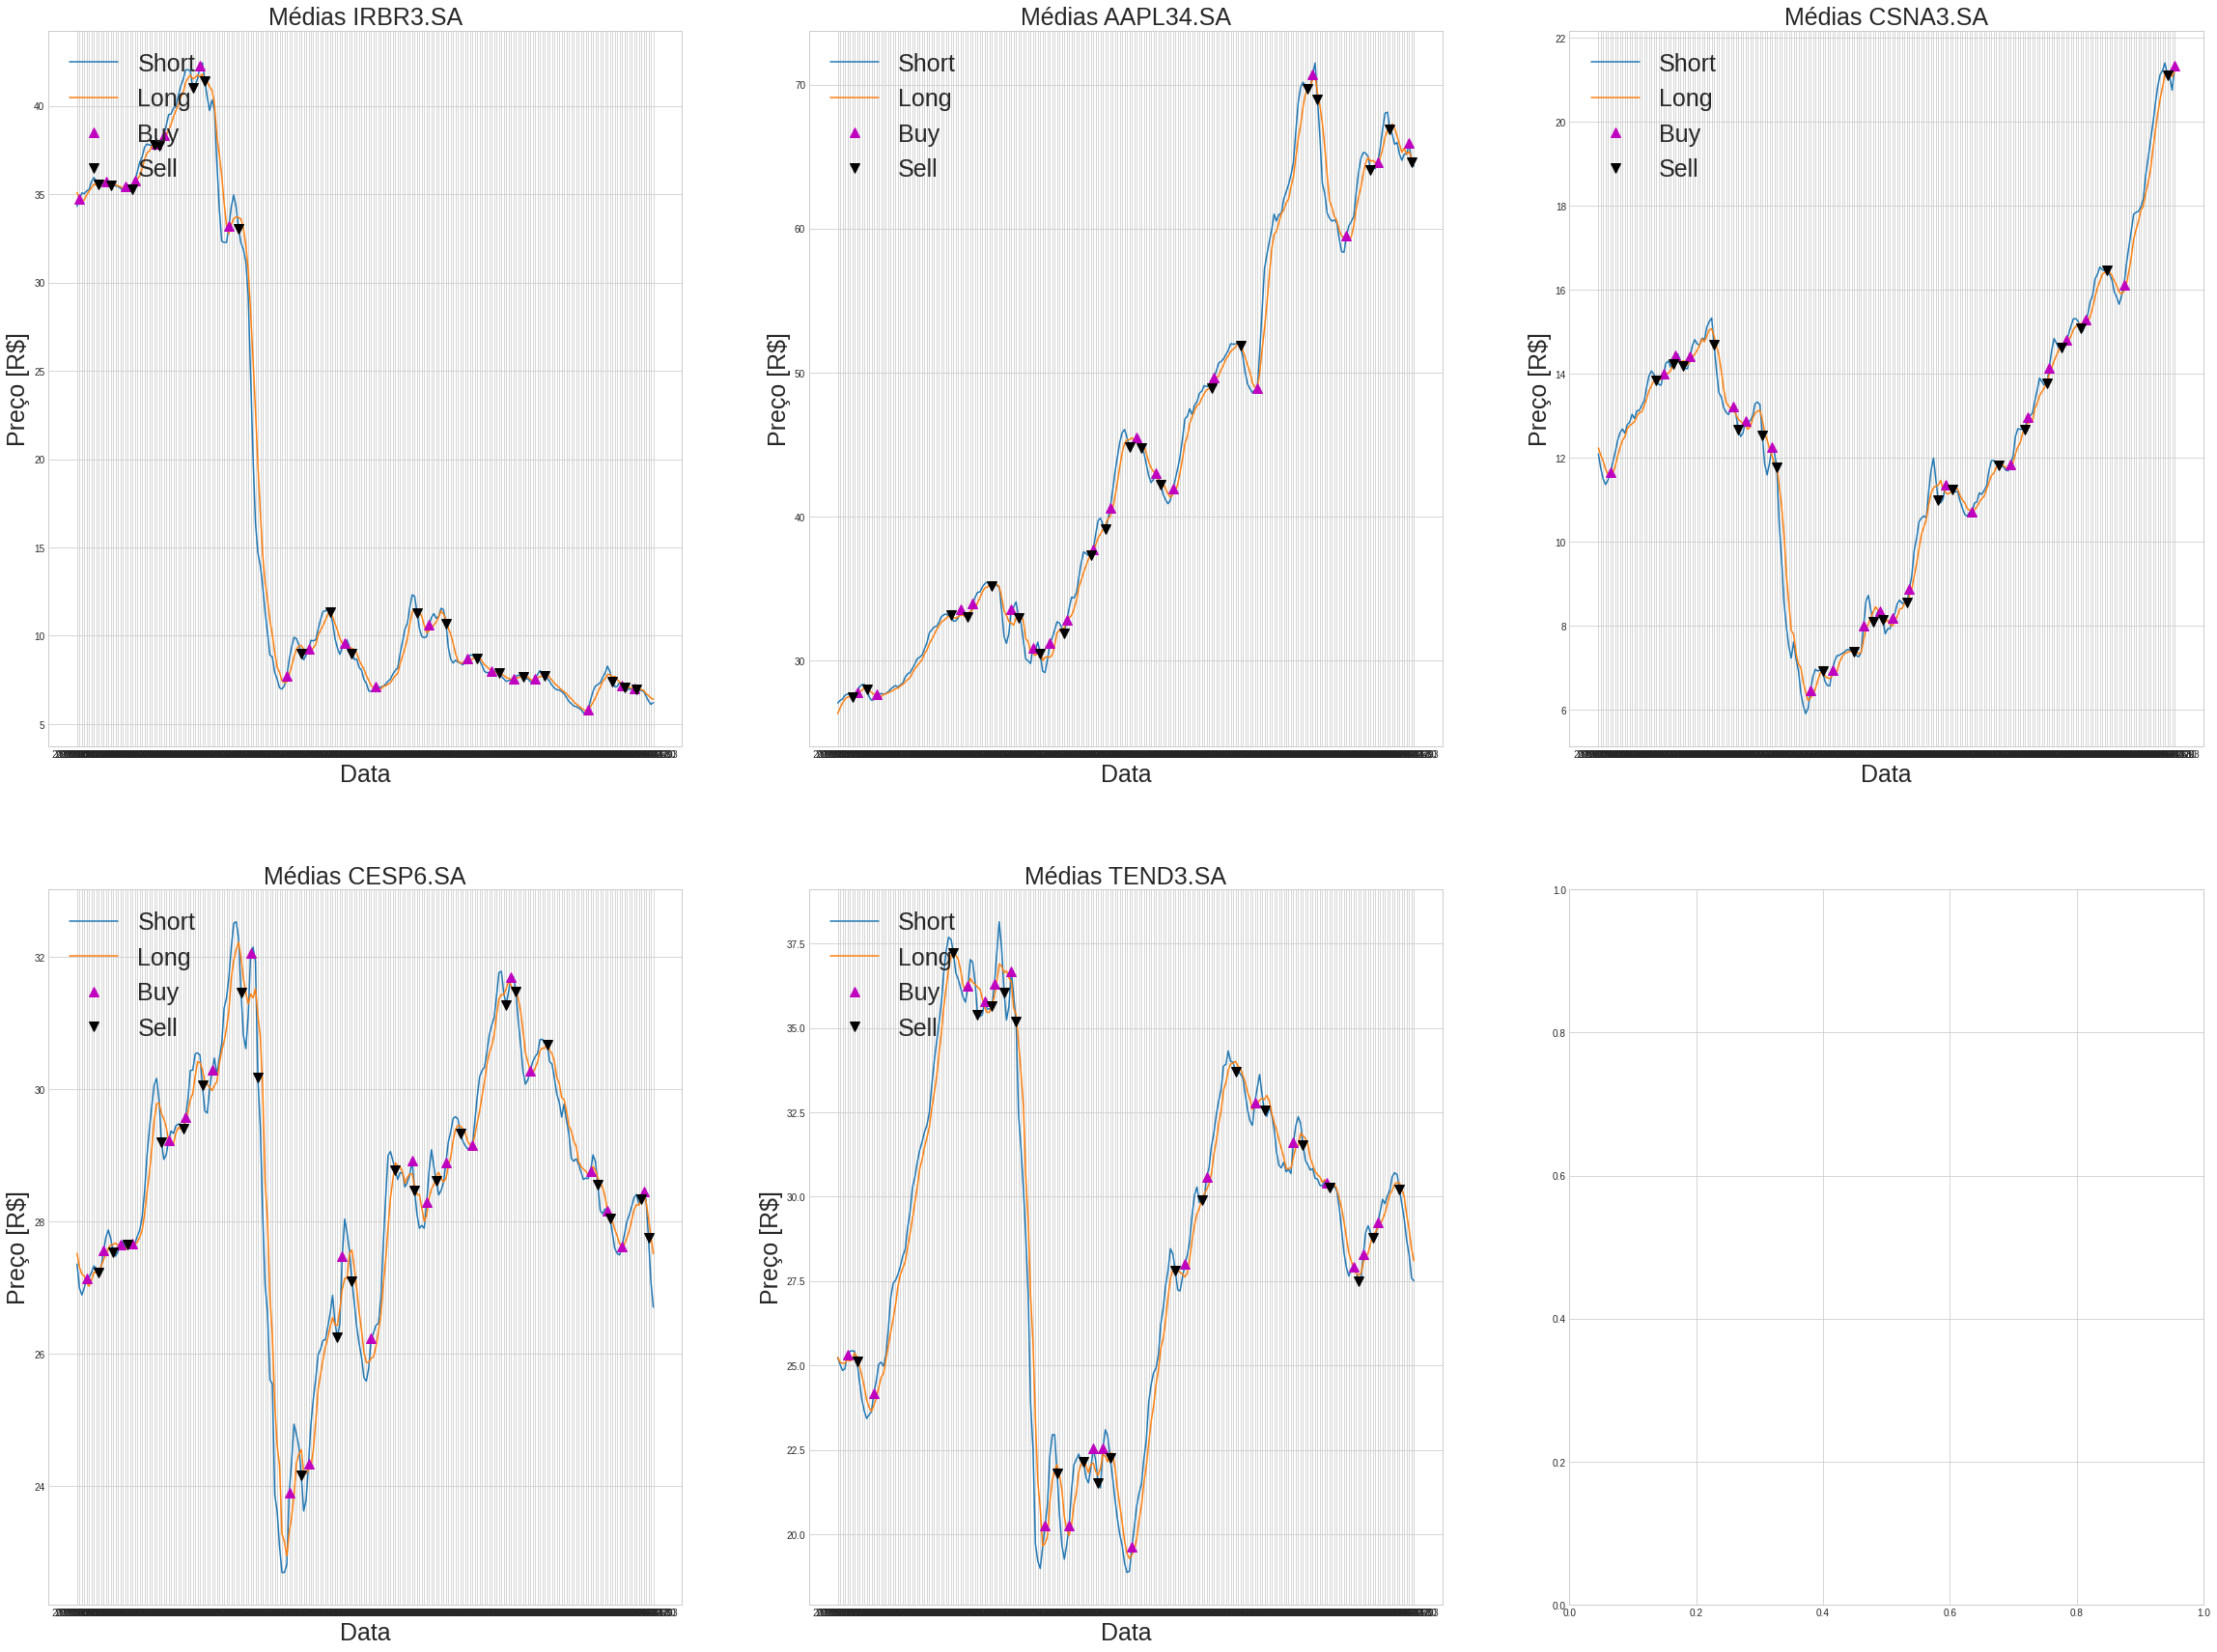

In [20]:
plot_buy_sell_long_short(test, short_t, long_t, long_short_diff_t)